# Linear Regression Analysis
## Basic Data Checks

In [1]:
# Load some basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data
df = pd.read_csv('../Data/salary.csv')

In [3]:
# Look at a snippet of data
df.head()

,salary,gender,departm,years,age
0,86285,0,bio,26,64
1,77125,0,bio,28,58
2,71922,0,bio,10,38
3,70499,0,bio,16,46
4,66624,0,bio,11,41


In [4]:
# summarize data; note it doesn't show categorical values...
df.describe()

,salary,gender,years,age
count,77.000000,77.000000,77.000000,77.000000
mean,67748.519481,0.116883,14.922078,45.610390
std,15100.581435,0.323388,8.572855,9.011916
min,44687.000000,0.000000,1.000000,31.000000
25%,57185.000000,0.000000,8.000000,38.000000
50%,62607.000000,0.000000,14.000000,44.000000
75%,75382.000000,0.000000,23.000000,53.000000
max,112800.000000,1.000000,34.000000,65.000000


In [5]:
# Check what kind of values are in departm
df.departm.describe()

count      77
unique      7
top       bio
freq       16
Name: departm, dtype: object

In [6]:
# Look at the keys 
df.keys()

Index([u'salary', u'gender', u'departm', u'years', u'age'], dtype='object')

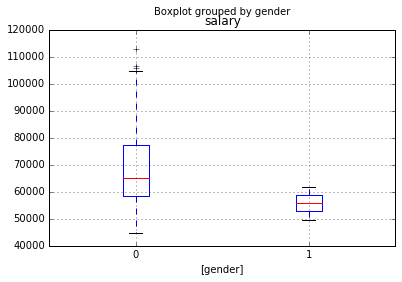

In [7]:
# boxplot data, subset by gender
dfsubset = df[['salary','gender']]
ax=dfsubset.boxplot(by='gender')

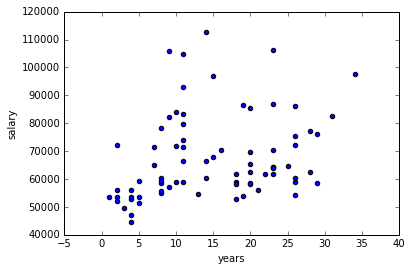

In [8]:
# boxplot data, subset by years
dfsubset = df[['salary','years']]
dfsubset.plot(kind='scatter', x='years', y='salary');

In [9]:
# Oneshot visualization
## create a new numericalSeries called dept !! Just for visualization !! 
df['dept_num'] = df.departm.map({'bio':0, 'chem':1,'geol':2,'neuro':3,'stat':4,'physics':5,'math':6})
df.head()

,salary,gender,departm,years,age,dept_num
0,86285,0,bio,26,64,0
1,77125,0,bio,28,58,0
2,71922,0,bio,10,38,0
3,70499,0,bio,16,46,0
4,66624,0,bio,11,41,0


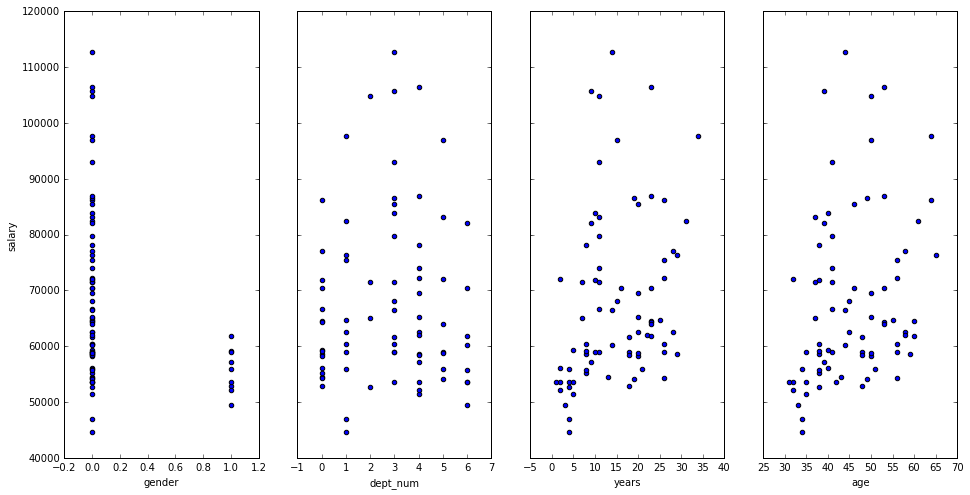

In [10]:
## Now plot all four categories
fig, axs = plt.subplots(1, 4, sharey=True)
df.plot(kind='scatter', x='gender', y='salary', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='dept_num', y='salary', ax=axs[1])
df.plot(kind='scatter', x='years', y='salary', ax=axs[2])
df.plot(kind='scatter', x='age', y='salary', ax=axs[3])
# The problem is that it treats department as a continuous variable. 

## Linear Regression 

In [11]:
# Now to the linear model, with Statsmodels
import statsmodels.formula.api as smf
# Create a function for the 
lm = smf.ols(formula = "salary ~ gender",data=df).fit()
print(lm.summary())
# The t stats here indicate whether the coefficient is significantly different from 0

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     6.975
Date:                Thu, 31 Mar 2016   Prob (F-statistic):             0.0101
Time:                        10:51:30   Log-Likelihood:                -846.26
No. Observations:                  77   AIC:                             1697.
Df Residuals:                      75   BIC:                             1701.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   6.934e+04   1763.213     39.326      0.0

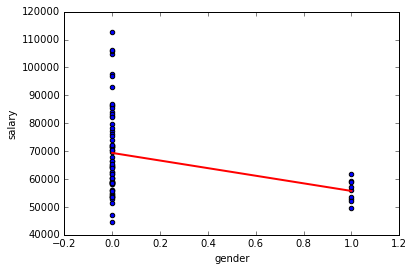

In [12]:
# Plot Least Squares Line
# create a DataFrame with the minimum and maximum values of X(gender)
X_new = pd.DataFrame({'gender': [df.gender.min(), df.gender.max()]})
X_new.head()
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds
# first, plot the observed data
df.plot(kind='scatter', x='gender', y='salary')
# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [13]:
lm2 = smf.ols(formula = "salary ~ gender + years",data=df).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     5.478
Date:                Thu, 31 Mar 2016   Prob (F-statistic):            0.00604
Time:                        10:51:30   Log-Likelihood:                -844.37
No. Observations:                  77   AIC:                             1695.
Df Residuals:                      74   BIC:                             1702.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   6.331e+04   3571.530     17.726      0.0

In [14]:
lm3 = smf.ols(formula = "salary ~ gender + years + departm",data=df).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     3.274
Date:                Thu, 31 Mar 2016   Prob (F-statistic):            0.00324
Time:                        10:51:30   Log-Likelihood:                -837.14
No. Observations:                  77   AIC:                             1692.
Df Residuals:                      68   BIC:                             1713.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept           5.541e+04   4764

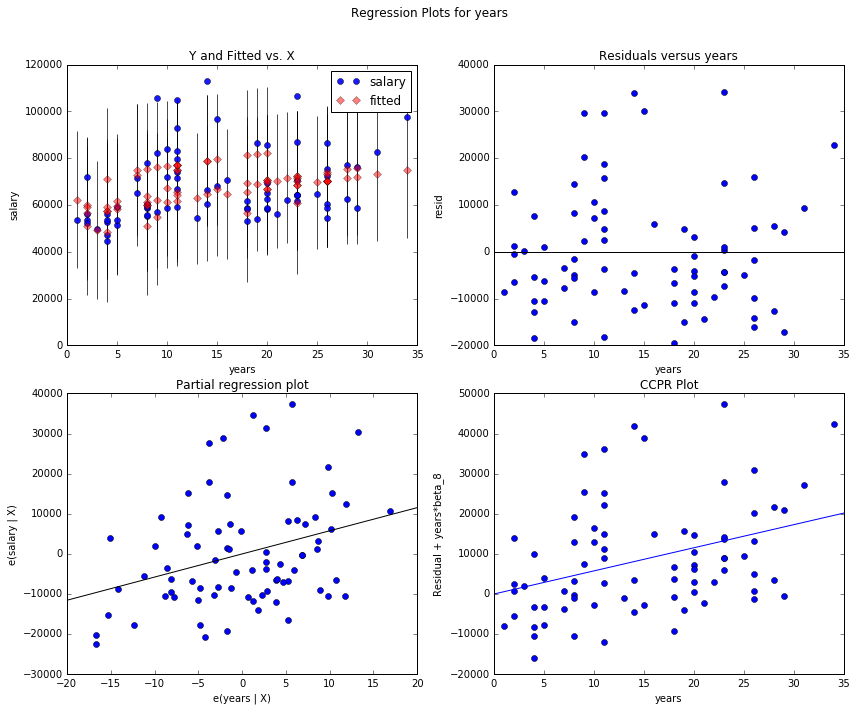

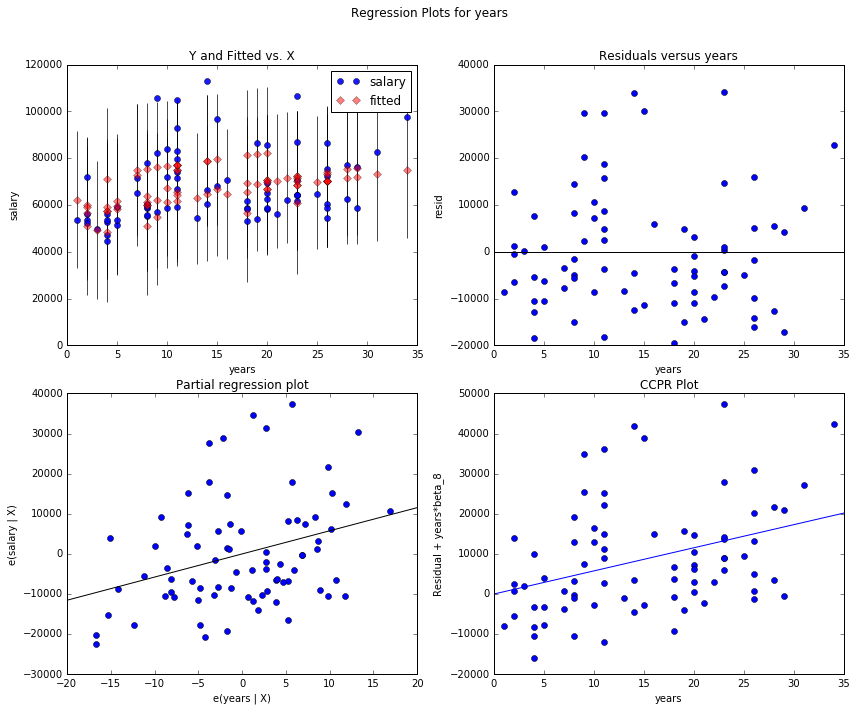

In [55]:
ax = plt.figure(figsize=(12,10))
sm.graphics.plot_regress_exog(lm3, 'years',fig=ax)

In [28]:
# Get regression table, F statistics as if doing Anova
# df for departm is 6 because there was 7 departm categories. 
# F stat tests whether at least one of the coefficients of the variables of a category
# is significantly different from 0 or not
# Type of SSQ to consider https://mcfromnz.wordpress.com/2011/03/02/anova-type-iiiiii-ss-explained/

# Type 1 SSQ
import statsmodels.api as sm
from statsmodels.formula.api import ols
print('ANOVA table for Type 1 SSQ')
print(sm.stats.anova_lm(lm3,typ=1))

# Type 2 SSQ: tests each main effect after the other main effect, without interaction term
print('ANOVA table for Type 2 SSQ')
print(sm.stats.anova_lm(lm3,typ=2))

# Type 3 SSQ: valid for models with significant interaction terms
print('ANOVA table for Type 3 SSQ')
print(sm.stats.anova_lm(lm3,typ=3))

ANOVA table for Type 1 SSQ
            df        sum_sq       mean_sq         F    PR(>F)
departm    6.0  2.031625e+09  3.386041e+08  1.840413  0.104149
gender     1.0  1.310673e+09  1.310673e+09  7.123895  0.009503
years      1.0  1.476974e+09  1.476974e+09  8.027786  0.006057
Residual  68.0  1.251082e+10  1.839827e+08       NaN       NaN
ANOVA table for Type 2 SSQ
                sum_sq    df         F    PR(>F)
departm   2.584326e+09   6.0  2.341095  0.040940
gender    6.002753e+08   1.0  3.262673  0.075299
years     1.476974e+09   1.0  8.027786  0.006057
Residual  1.251082e+10  68.0       NaN       NaN
ANOVA table for Type 3 SSQ
                 sum_sq    df           F        PR(>F)
Intercept  2.488383e+10   1.0  135.250944  7.973772e-18
departm    2.584326e+09   6.0    2.341095  4.094000e-02
gender     6.002753e+08   1.0    3.262673  7.529866e-02
years      1.476974e+09   1.0    8.027786  6.057458e-03
Residual   1.251082e+10  68.0         NaN           NaN


In [29]:
# Simple model comparison
print(sm.stats.anova_lm(lm,lm2,lm3))

   df_resid           ssr  df_diff       ss_diff         F    Pr(>F)
0      75.0  1.585550e+10      0.0           NaN       NaN       NaN
1      74.0  1.509515e+10      1.0  7.603509e+08  4.132731  0.045649
2      68.0  1.251082e+10      6.0  2.584326e+09  2.341095  0.040940


## Design matrices

In [36]:
# Import requried module
from patsy import dmatrices
# Use the dmatrices function
y, X = dmatrices('salary ~ gender + years + departm', data=df, return_type='dataframe')

In [40]:
y.head()

,salary
0,86285.0
1,77125.0
2,71922.0
3,70499.0
4,66624.0


In [41]:
X.head()

,Intercept,departm[T.chem],departm[T.geol],departm[T.math],departm[T.neuro],departm[T.physics],departm[T.stat],gender,years
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0


# Individual exercise
### Use the 'salary_exercise.csv' to apply the analyses we learned today.

In [66]:
dff = pd.read_csv('../Data/salary_exercise.csv')

In [70]:
dff.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [69]:
dff.describe()

,yr,yd,sl
count,52.000000,52.000000,52.000000
mean,7.480769,16.115385,23797.653846
std,5.507536,10.222340,5917.289154
min,0.000000,1.000000,15000.000000
25%,3.000000,6.750000,18246.750000
50%,7.000000,15.500000,23719.000000
75%,11.000000,23.250000,27258.500000
max,25.000000,35.000000,38045.000000


In [88]:
lmm = smf.ols(formula = "sl ~ sx + rk + yr + dg + yd",data=dff).fit()

In [75]:
print(lmm.summary())

                            OLS Regression Results                            
Dep. Variable:                     sl   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     44.24
Date:                Thu, 31 Mar 2016   Prob (F-statistic):           2.87e-17
Time:                        11:36:27   Log-Likelihood:                -474.72
No. Observations:                  52   AIC:                             963.4
Df Residuals:                      45   BIC:                             977.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        1.691e+04    816.442     

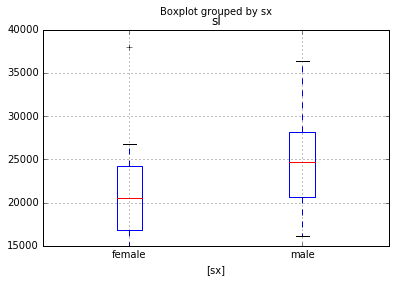

In [82]:
dffsubset = dff[['sl','sx']]
ax=dffsubset.boxplot(by='sx')

In [84]:
y, X = dmatrices('sl ~ sx + rk + dg +yr + yd', data=dff, return_type='dataframe')

In [85]:
y.head()

,sl
0,36350.0
1,35350.0
2,28200.0
3,26775.0
4,33696.0


In [86]:
X.head()

,Intercept,sx[T.male],rk[T.associate],rk[T.full],dg[T.masters],yr,yd
0,1.0,1.0,0.0,1.0,0.0,25.0,35.0
1,1.0,1.0,0.0,1.0,0.0,13.0,22.0
2,1.0,1.0,0.0,1.0,0.0,10.0,23.0
3,1.0,0.0,0.0,1.0,0.0,7.0,27.0
4,1.0,1.0,0.0,1.0,1.0,19.0,30.0


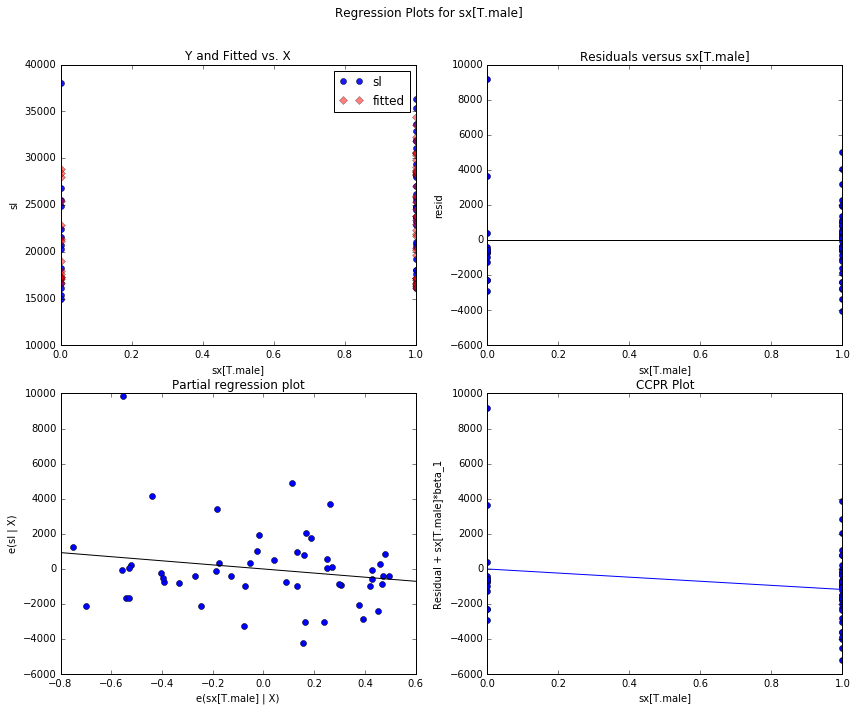

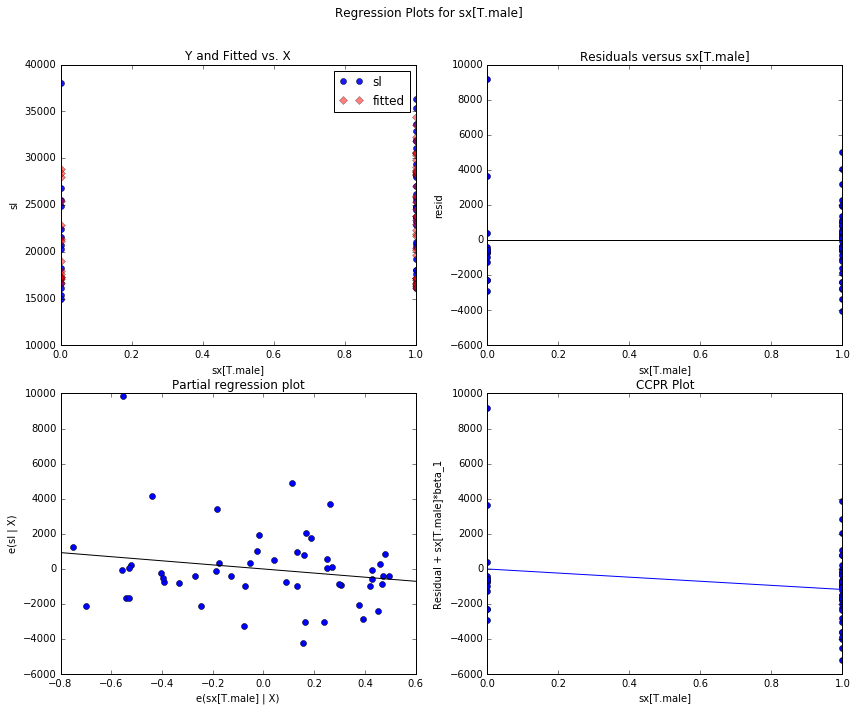

In [92]:
ax = plt.figure(figsize=(12,10))
sm.graphics.plot_regress_exog(lmm, 'sx[T.male]',fig=ax)